In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder


In [2]:
url = "spotify-2023.csv"
data = pd.read_csv(url, encoding='latin')


In [3]:
data = data.dropna()  # Drop rows with missing values for simplicity

In [4]:
# Convert valid strings to integers and invalid strings to NaN
data['streams'] = pd.to_numeric(data['streams'], errors='coerce')

# Drop rows with NaN values in the 'streams' column
data = data.dropna(subset=['streams'])

# Convert the 'streams' column to integer type
data['streams'] = data['streams'].astype(int)

C:\Users\Akeel\anaconda3\Lib\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)


In [5]:
# List of columns that might have numbers formatted with commas
cols_with_commas = ['in_spotify_playlists', 'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts']

# For each column, try to convert to float
for col in cols_with_commas:
    try:
        data[col] = data[col].str.replace(',', '').astype(float)
    except:
        # If conversion fails, print the column name for debugging
        print(f"Issue with column: {col}")


Issue with column: in_spotify_playlists
Issue with column: in_spotify_charts
Issue with column: streams
Issue with column: in_apple_playlists
Issue with column: in_apple_charts
Issue with column: in_deezer_charts


In [6]:
label_encoders = {}
for column in ['key', 'mode']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [7]:
X = data.drop(columns=['track_name', 'artist(s)_name', 'streams'])
y = data['streams']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [9]:
y_pred = tree_model.predict(X_test)

In [10]:
print(y_test.head())

228      39666245
343      83021468
871    1553497987
261     266624541
648     716591492
Name: streams, dtype: int32


In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")

MAE: 299265398.3109756
MSE: 5.572588370591165e+17
R^2: -0.49039134158965725


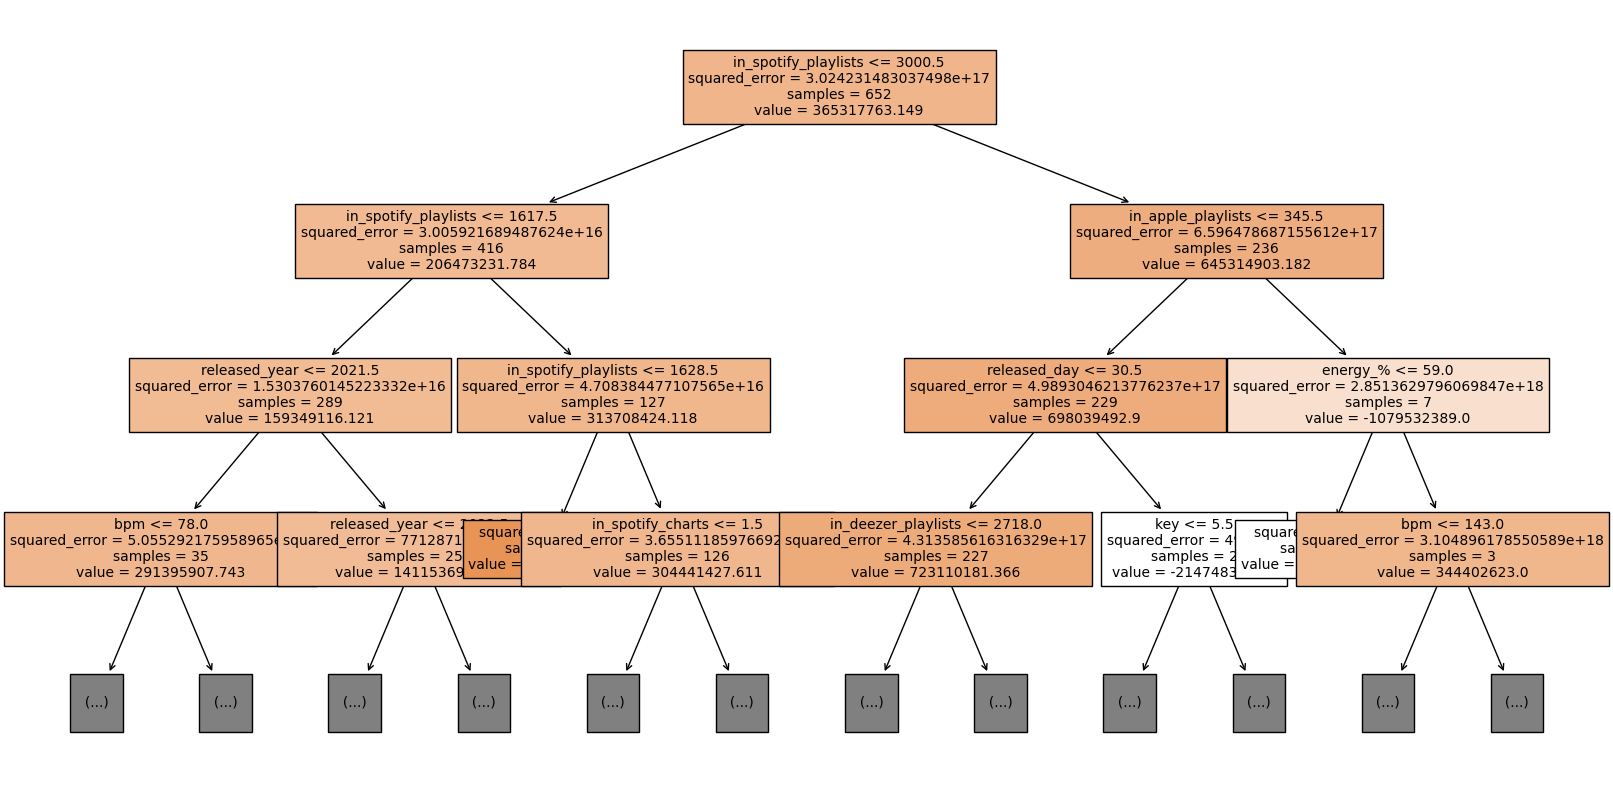

In [12]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(tree_model, filled=True, feature_names=X_train.columns, max_depth=3, fontsize=10)
plt.show()


In [13]:
from sklearn.metrics import mean_absolute_error

# Original model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)
print(f"Original MAE: {mean_absolute_error(y_test, y_pred)}")

# Fine-tuned model
tree_model_tuned = DecisionTreeRegressor(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)
tree_model_tuned.fit(X_train, y_train)
y_pred_tuned = tree_model_tuned.predict(X_test)
print(f"Tuned MAE: {mean_absolute_error(y_test, y_pred_tuned)}")


Original MAE: 299265398.3109756
Tuned MAE: 189505788.07169858
